In [1]:
#import data into d
import pandas as pd
import csv
with open('auto-mpg.data') as f:
    reader = csv.reader(f,delimiter=",")
    d = list(reader)
    
#DELETE ALL ROWS OF WHICH THE VALUE OF HORSEPOWER,WEIGHT,OR ACCELERATION IS UNKNOWN
del(d[32])
del(d[126-1])
del(d[330-2])
del(d[336-3])
del(d[354-4])
del(d[374-5])


In [2]:
#split data into test (20%) and traning (80%)
from random import shuffle
total=[]
for x in range(0,len(d)):
    #put all indeces into total
    total.append(x)
#shuffle all of the indices
shuffle(total)
train=[]
for x in range(0,int(len(total)*0.8)):
    #put first 80% of random indeces into train
    train.append(total[x])
test=[]
for x in range(int(len(total)*0.8),len(total)):
    #put last 20% of random indeces into test
    test.append(total[x])

Linear regression equation: $$y=\beta_0+\beta_1(horsepower)+\beta_2(weight)+\beta_3(acceleration)$$

In [3]:
import numpy as np
H=np.zeros((len(train),4))
z=np.zeros((len(train),1))
for x in range(0,len(train)):
    z[x][0]=(d[train[x]][0])
    H[x][0]=1
    H[x][1]=d[train[x]][3]
    H[x][2]=d[train[x]][4]
    H[x][3]=d[train[x]][5]
x=np.linalg.lstsq(H,z)[0]
#values of the betas
first = x[0][0]
second=x[1][0]
third=x[2][0]
fourth=x[3][0]

In [4]:
#PRINT SOLVED LINEAR REGRESSION
print("Solved linear regression equation: \ny=",first,"+",second,"*(horsepower)+",
      third,"*(weight)+",fourth,"*(acceleration)")

Solved linear regression equation: 
y= 44.9950756103 + -0.0497785932529 *(horsepower)+ -0.00560180167866 *(weight)+ 0.0186624070058 *(acceleration)


In [5]:
predict=[]
actual=[]
for x in range(0,len(test)):
    predict.append((first)+(second*(float(d[test[x]][3])))+(third*float((d[test[x]][4]))+(fourth*float(d[test[x]][5]))))
    actual.append(d[test[x]][0])

In [6]:
#Calculated sum of squared errors
sumOfSquares=0.0
for x in range(0,len(actual)):
    sumOfSquares+=(float(actual[x])-float(predict[x]))**2
print("Sum of Squared errors: ",sumOfSquares)

Sum of Squared errors:  1071.109417797276


In [7]:
#Sort values for graph
for x in range(0,len(actual)):
    smallest=x
    for y in range(x,len(actual)):
        if (actual[smallest]>actual[y]):
            smallest=y
    if (smallest !=x):
        temp=actual[x]
        actual[x]=actual[smallest]
        actual[smallest]=temp
        temp=predict[x]
        predict[x]=predict[smallest]
        predict[smallest]=temp

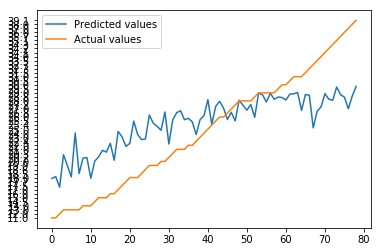

In [8]:
#print graph
import matplotlib.pyplot as plt
plt.plot(predict,label='Predicted values')
plt.plot(actual,label='Actual values')
plt.legend()
plt.show()